In [1]:
import os
import sys
LIB = os.curdir + '/../lib'

if LIB not in sys.path:
    sys.path.append(LIB)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier

from functions import load_excel_data, confusion_matrix, using_model_clf, get_roc_auc_score
%matplotlib inline

In [2]:
base_directory = '~/workspace/personal/datasets/DryBeanDataset'

columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 
           'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
           'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

In [3]:
dry_bean_df = load_excel_data(base_directory, 'Dry_Bean_Dataset.xlsx')

In [4]:
dry_bean_df = dry_bean_df.drop(['AspectRation', 'Eccentricity', 'Compactness', 'MinorAxisLength', 'EquivDiameter', 'ConvexArea', 'Perimeter'],
                 axis=1)

In [5]:

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 

for train_index, test_index in split.split(dry_bean_df, dry_bean_df["Class"]):
        train_set = dry_bean_df.loc[train_index]
        test_set = dry_bean_df.loc[test_index]

In [6]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

ct = ColumnTransformer([
        ("norm2", num_pipeline, list(dry_bean_df.drop(['Class'], axis=1)))
])

lb = LabelEncoder()

X_train_set = train_set.drop(['Class'], axis=1)
Y_train_set = train_set['Class'].copy()

X_test_set = test_set.drop(['Class'], axis=1)
Y_test_set = test_set['Class'].copy()

X_train = ct.fit_transform(X_train_set)
Y_train = lb.fit_transform(Y_train_set)

X_test = ct.fit_transform(X_test_set)
Y_test = lb.fit_transform(Y_test_set)

[[ 962    0   56    0    4    6   29]
 [   0  418    0    0    0    0    0]
 [  35    0 1233    0   21    1   14]
 [   2    0    0 2604    5   43  183]
 [   2    0   23   13 1476    0   28]
 [  13    0    1   21    0 1535   51]
 [   4    0    5  180   40   30 1850]]


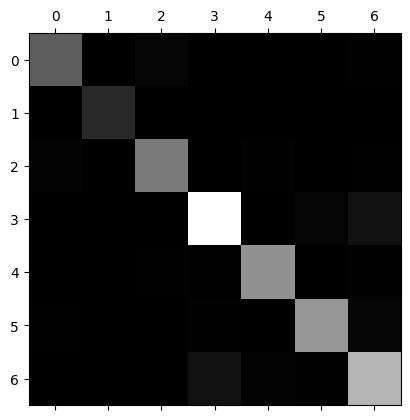

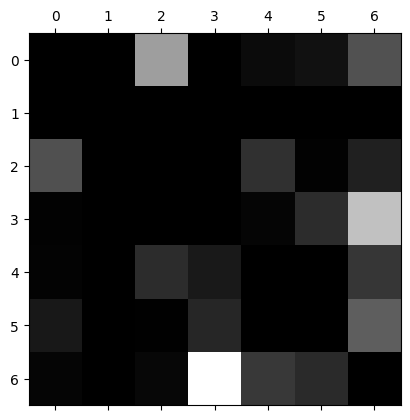

In [7]:
confusion_matrix(LogisticRegression(max_iter=500, multi_class="multinomial"), X_train, Y_train)

In [8]:
lr = using_model_clf(LogisticRegression(max_iter=500, multi_class="multinomial"), X_train, Y_train, X_test, Y_test)

****************** LogisticRegression(max_iter=500, multi_class='multinomial') ******************
accuracy_score= 0.9192067572530297
precision_score= 0.9192067572530297
recall_score= 0.9192067572530297
f1_score=[0.91796875 0.99516908 0.93455099 0.91412349 0.95708713 0.94046173
 0.85874649], f1_score_micro=0.9192067572530298, f1_score_macro=0.9311582366986684


In [9]:
using_model_clf(DecisionTreeClassifier(), X_train, Y_train, X_test, Y_test)

****************** DecisionTreeClassifier() ******************
accuracy_score= 0.8953360264414248
precision_score= 0.8953360264414248
recall_score= 0.8953360264414248
f1_score=[0.88930582 1.         0.91472868 0.89217759 0.94270833 0.91525424
 0.81948424], f1_score_micro=0.8953360264414248, f1_score_macro=0.9105226999238262


DecisionTreeClassifier()

In [10]:
using_model_clf(DecisionTreeClassifier(max_features='sqrt', splitter='best'), X_train, Y_train, X_test, Y_test)

****************** DecisionTreeClassifier(max_features='sqrt') ******************
accuracy_score= 0.8909291222915902
precision_score= 0.8909291222915902
recall_score= 0.8909291222915902
f1_score=[0.87258687 1.         0.91489362 0.8820656  0.94559585 0.92760736
 0.80614203], f1_score_micro=0.8909291222915902, f1_score_macro=0.9069844768132782


DecisionTreeClassifier(max_features='sqrt')

In [11]:
using_model_clf(RandomForestClassifier(), X_train, Y_train, X_test, Y_test)

****************** RandomForestClassifier() ******************
accuracy_score= 0.9232464193903782
precision_score= 0.9232464193903782
recall_score= 0.9232464193903782
f1_score=[0.91472868 1.         0.93415008 0.91759777 0.96103896 0.95238095
 0.86259542], f1_score_micro=0.9232464193903782, f1_score_macro=0.9346416939100843


RandomForestClassifier()

In [12]:
using_model_clf(SGDClassifier(), X_train, Y_train, X_test, Y_test)

****************** SGDClassifier() ******************
accuracy_score= 0.9114946749908189
precision_score= 0.9114946749908189
recall_score= 0.9114946749908189
f1_score=[0.89587426 1.         0.92780338 0.90701001 0.94764398 0.94409938
 0.84968497], f1_score_micro=0.9114946749908188, f1_score_macro=0.9245879976314514


SGDClassifier()

In [13]:
from sklearn.neighbors import KNeighborsClassifier

using_model_clf(KNeighborsClassifier(), X_train, Y_train, X_test, Y_test)

****************** KNeighborsClassifier() ******************
accuracy_score= 0.9155343371281675
precision_score= 0.9155343371281675
recall_score= 0.9155343371281675
f1_score=[0.91650485 1.         0.93333333 0.90679748 0.95300261 0.94451295
 0.84985836], f1_score_micro=0.9155343371281675, f1_score_macro=0.9291442256875456


KNeighborsClassifier()

In [14]:
ovr = OneVsRestClassifier(SVC())
using_model_clf(ovr, X_train, Y_train, X_test, Y_test)

****************** OneVsRestClassifier(estimator=SVC()) ******************
accuracy_score= 0.927653323540213
precision_score= 0.927653323540213
recall_score= 0.927653323540213
f1_score=[0.9254902  1.         0.94063927 0.92144374 0.95989651 0.94518879
 0.87781955], f1_score_micro=0.927653323540213, f1_score_macro=0.9386397217651389


OneVsRestClassifier(estimator=SVC())

In [15]:
using_model_clf(AdaBoostClassifier(), X_train, Y_train, X_test, Y_test)

****************** AdaBoostClassifier() ******************
accuracy_score= 0.6301872934263679
precision_score= 0.6301872934263679
recall_score= 0.6301872934263679
f1_score=[0.         0.         0.62729913 0.75955056 0.7820711  0.34068136
 0.74556213], f1_score_micro=0.6301872934263679, f1_score_macro=0.4650234686892025


AdaBoostClassifier()

In [16]:
a = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15), n_estimators=225, 
                       algorithm="SAMME.R", learning_rate=0.3)
using_model_clf(a, X_train, Y_train, X_test, Y_test)

****************** AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=15),
                   learning_rate=0.3, n_estimators=225) ******************
accuracy_score= 0.9214102093279471
precision_score= 0.9214102093279471
recall_score= 0.9214102093279471
f1_score=[0.92307692 1.         0.94135802 0.91304348 0.95708713 0.94390244
 0.86066351], f1_score_micro=0.9214102093279471, f1_score_macro=0.934161642614341


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=15),
                   learning_rate=0.3, n_estimators=225)

In [17]:

a1 = AdaBoostClassifier(LogisticRegression(max_iter=500, multi_class="multinomial"),
                        n_estimators=225, algorithm="SAMME.R", learning_rate=0.3)
using_model_clf(a1, X_train, Y_train, X_test, Y_test)

****************** AdaBoostClassifier(estimator=LogisticRegression(max_iter=500,
                                                multi_class='multinomial'),
                   learning_rate=0.3, n_estimators=225) ******************
accuracy_score= 0.8446566287183254
precision_score= 0.8446566287183254
recall_score= 0.8446566287183254
f1_score=[0.89443378 0.95477387 0.90801187 0.78544915 0.93650794 0.79888268
 0.80616383], f1_score_micro=0.8446566287183255, f1_score_macro=0.8691747303368148


AdaBoostClassifier(estimator=LogisticRegression(max_iter=500,
                                                multi_class='multinomial'),
                   learning_rate=0.3, n_estimators=225)